Cleaning the data is the most important step that we cannot avoid. To clean this dataset.

**Contents:**

1. Missing value handling
2. Outliers handling

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data comments
comments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ DS 24_Novita Fitriani_Progress Final Project/Dataset/Comments.csv')

In [ ]:
comments.head()

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


In [ ]:
# load data course_info
course = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ DS 24_Novita Fitriani_Progress Final Project/Dataset/Course_info.csv')

In [ ]:
# Change the type of the data for efficient storage
dtypes = {'id' : 'int64',
          'num_subscribers' : 'int32',
          'num_reviews' : 'int32',
          'num_comments' : 'int32',
          'num_lectures' : 'int32',
          'content_length_min' : 'int32'}

course = course.astype(dtypes)

course['published_time'] = pd.to_datetime(course['published_time'])
course['last_update_date'] = pd.to_datetime(course['last_update_date'])

course = course.rename(columns= {'id' : 'course_id'})

In [ ]:
# inner join the comments and course info based on course_id
courses_data = comments.merge(course, on='course_id')

In [ ]:
# remove content_length = 0
courses_data = courses_data[~(courses_data['content_length_min'] == 0)]

In [ ]:
# filter the data courses only for english and indonesian language only
courses_data = courses_data[(courses_data['language'] == 'English') | (courses_data['language'] == 'Indonesian')]

In [ ]:
def missing_value(df):

    missing = []
    for columns in df.columns:

        missing_shape = df[df[columns].isna()].shape
        percentage = round(missing_shape[0]/df.shape[0] * 100, 3)

        if df[columns].dtypes != 'object':
            max, min = df[columns].max(), df[columns].min()
        else:
            max, min = '-', '-'

        missing.append({'Columns' : columns,
                        'N/A count' : missing_shape[0],
                        'Percentage' : str(percentage) + '%',
                        'Max' : max,
                        'Min' : min}
                        )
    return pd.DataFrame(missing).sort_values(by='Percentage', ascending=False)

missing = missing_value(courses_data)
missing

,Columns,N/A count,Percentage,Max,Min
4,display_name,72564,1.078%,-,-
17,last_update_date,6800,0.101%,2022-10-10 00:00:00,2012-10-31 00:00:00
5,comment,6365,0.095%,-,-
24,instructor_url,6205,0.092%,-,-
20,topic,5871,0.087%,-,-
9,headline,853,0.013%,-,-
23,instructor_name,60,0.001%,-,-
14,num_lectures,0,0.0%,1095,1
22,course_url,0,0.0%,-,-
21,language,0,0.0%,-,-


In [ ]:
# Total missing value
missing_percentage = missing['N/A count'].sum() / courses_data.shape[0] * 100
print('Missing Value Percentage = {:.2f}%'.format(missing_percentage))

Missing Value Percentage = 1.47%


In [ ]:
# we can safely drop the missing value since the percentage is below 5%
courses_data.dropna(inplace=True)

In [ ]:
# Check duplicated value
duplicated_sum = courses_data.duplicated().sum()
duplicated_percentage = duplicated_sum / courses_data.shape[0] * 100

# Print total duplicated value and its percentage
print('Total Duplicate Data = {} \nDuplicated Percentage = {:.2f}%'.format(duplicated_sum, duplicated_percentage))

Total Duplicate Data = 0 
Duplicated Percentage = 0.00%


In [ ]:
# get sample data; take 5%
sample_data = courses_data.sample(frac=0.05)

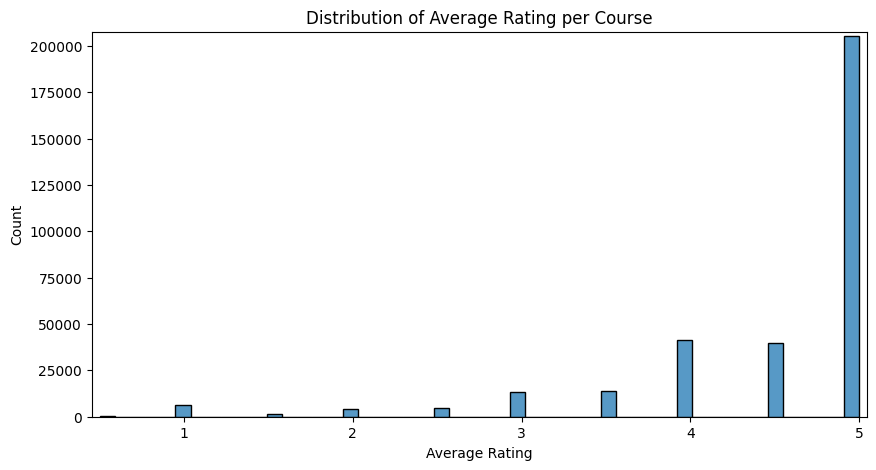

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(sample_data, x='rate', bins=50)
ax.set(xlabel='Average Rating', title='Distribution of Average Rating per Course')
plt.margins(0.01)
plt.show()

Observations:
- After sampling, the distribution of average ratings per course remains well-maintained across ratings from 0 to 5. This indicates that the sampling process was conducted effectively without significantly altering the rating distribution.

In [ ]:
sample_data.head()

,id,course_id,rate,date,display_name,comment,title,is_paid,price,headline,...,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
4521648,124970868,3219295,4.0,2022-09-30T03:59:05-07:00,Srilakshmi,Good,OAuth 2.0 in Spring Boot Applications,True,49.99,The New OAuth 2.0 Stack in Spring Security 5,...,654,2020-09-19 19:56:15+00:00,2022-07-14,Development,Software Engineering,OAuth,English,/course/oauth2-in-spring-boot-applications/,Sergey Kargopolov,/user/sergeykargopolov/
1192505,111030240,3543562,1.0,2022-04-03T01:52:34-07:00,Mohamed,wth is this??,Artificial Intelligence in App Creation: Begin...,True,19.99,A world-changing online course focussed on Art...,...,48,2020-10-04 14:45:32+00:00,2022-09-07,Development,Mobile Development,App Development,English,/course/artificial-intelligence-in-app-creatio...,Srinidhi Ranganathan,/user/srinidhi-ranganathan/
7373154,31328116,396876,5.0,2019-05-12T05:31:51-07:00,Calum,Extremely clear and easy to understand. Full e...,Learning Python for Data Analysis and Visualiz...,True,189.99,"Learn python and how to use it to analyze,visu...",...,1265,2015-03-09 19:22:07+00:00,2019-09-04,Development,Programming Languages,Python,English,/course/learning-python-for-data-analysis-and-...,Jose Portilla,/user/joseportilla/
7495086,59604072,1122334,4.5,2020-06-26T22:50:10-07:00,Naveen,Nice and having fun in learning,A Practical Introduction to Cloud Computing,False,0.00,Cloud Computing made simple with real world pr...,...,157,2017-02-23 00:29:47+00:00,2021-04-14,IT & Software,Other IT & Software,Cloud Computing,English,/course/introduction-cloud-computing/,Neil Anderson,/user/10f3ef32-97d9-491d-bb7a-9e10677c3bd8/
5004269,14243750,1467252,5.0,2018-02-28T05:07:02-08:00,Shirley,I am still completing this course but so far I...,Fully Accredited Professional Counselling Dipl...,True,94.99,An In Depth Counseling Diploma Course To Take ...,...,55,2017-12-21 01:51:41+00:00,2021-06-12,Personal Development,Personal Transformation,Counseling,English,/course/fully-accredited-professional-counsell...,Dr Karen E Wells,/user/karen-e-wells/


In [ ]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331855 entries, 4521648 to 6832429
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  331855 non-null  int64              
 1   course_id           331855 non-null  int64              
 2   rate                331855 non-null  float64            
 3   date                331855 non-null  object             
 4   display_name        331855 non-null  object             
 5   comment             331855 non-null  object             
 6   title               331855 non-null  object             
 7   is_paid             331855 non-null  bool               
 8   price               331855 non-null  float64            
 9   headline            331855 non-null  object             
 10  num_subscribers     331855 non-null  int32              
 11  avg_rating          331855 non-null  float64            
 12  num_reviews   

In [ ]:
# merge with another dataframe to get the image
image_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ DS 24_Novita Fitriani_Progress Final Project/Dataset/merge/courses.csv')
image_df.head()

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image
0,567828,The Complete Python Bootcamp From Zero to Hero...,/course/complete-python-bootcamp/,4.592782,452973,155,2015-07-29T00:12:23Z,2021-03-14,22 total hours,9685726,https://img-c.udemycdn.com/course/750x422/5678...
1,1565838,The Complete 2023 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,4.667258,263152,490,2018-02-22T12:02:33Z,2023-01-20,65.5 total hours,31334738,https://img-c.udemycdn.com/course/750x422/1565...
2,625204,The Web Developer Bootcamp 2023,/course/the-web-developer-bootcamp/,4.696147,254711,616,2015-09-28T21:32:19Z,2023-02-12,64 total hours,4466306,https://img-c.udemycdn.com/course/750x422/6252...
3,756150,Angular - The Complete Guide (2023 Edition),/course/the-complete-guide-to-angular-2/,4.592692,180257,472,2016-02-08T17:02:55Z,2023-02-06,34.5 total hours,13952972,https://img-c.udemycdn.com/course/750x422/7561...
4,2776760,100 Days of Code: The Complete Python Pro Boot...,/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,2022-11-30,64 total hours,31334738,https://img-c.udemycdn.com/course/750x422/2776...


Observations:
- We need the image URL to display it in Streamlit.

In [ ]:
image_df = image_df.rename(columns={'id' : 'course_id'})

In [ ]:
image_df = image_df[['course_id', 'image']]

In [ ]:
# inner join the comments and course info based on course_id
udemy_data = sample_data.merge(image_df, on='course_id')

In [ ]:
udemy_data.head()

,id,course_id,rate,date,display_name,comment,title,is_paid,price,headline,...,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,image
0,124970868,3219295,4.0,2022-09-30T03:59:05-07:00,Srilakshmi,Good,OAuth 2.0 in Spring Boot Applications,True,49.99,The New OAuth 2.0 Stack in Spring Security 5,...,2020-09-19 19:56:15+00:00,2022-07-14,Development,Software Engineering,OAuth,English,/course/oauth2-in-spring-boot-applications/,Sergey Kargopolov,/user/sergeykargopolov/,https://img-c.udemycdn.com/course/750x422/3219...
1,122359118,3219295,5.0,2022-08-29T11:30:27-07:00,Nicu Alfonso,Oauth2 very well explained,OAuth 2.0 in Spring Boot Applications,True,49.99,The New OAuth 2.0 Stack in Spring Security 5,...,2020-09-19 19:56:15+00:00,2022-07-14,Development,Software Engineering,OAuth,English,/course/oauth2-in-spring-boot-applications/,Sergey Kargopolov,/user/sergeykargopolov/,https://img-c.udemycdn.com/course/750x422/3219...
2,85286752,3219295,4.5,2021-05-18T20:28:54-07:00,Tri,the course structured very well and sergey giv...,OAuth 2.0 in Spring Boot Applications,True,49.99,The New OAuth 2.0 Stack in Spring Security 5,...,2020-09-19 19:56:15+00:00,2022-07-14,Development,Software Engineering,OAuth,English,/course/oauth2-in-spring-boot-applications/,Sergey Kargopolov,/user/sergeykargopolov/,https://img-c.udemycdn.com/course/750x422/3219...
3,96749028,3219295,5.0,2021-09-30T00:50:02-07:00,Vijaya Bhaskar,Excellent course. I truely recommend this for ...,OAuth 2.0 in Spring Boot Applications,True,49.99,The New OAuth 2.0 Stack in Spring Security 5,...,2020-09-19 19:56:15+00:00,2022-07-14,Development,Software Engineering,OAuth,English,/course/oauth2-in-spring-boot-applications/,Sergey Kargopolov,/user/sergeykargopolov/,https://img-c.udemycdn.com/course/750x422/3219...
4,126452120,3219295,5.0,2022-10-19T08:31:37-07:00,Hiroko,"approachable, clear and concise explanation to...",OAuth 2.0 in Spring Boot Applications,True,49.99,The New OAuth 2.0 Stack in Spring Security 5,...,2020-09-19 19:56:15+00:00,2022-07-14,Development,Software Engineering,OAuth,English,/course/oauth2-in-spring-boot-applications/,Sergey Kargopolov,/user/sergeykargopolov/,https://img-c.udemycdn.com/course/750x422/3219...


In [ ]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263490 entries, 0 to 263489
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  263490 non-null  int64              
 1   course_id           263490 non-null  int64              
 2   rate                263490 non-null  float64            
 3   date                263490 non-null  object             
 4   display_name        263490 non-null  object             
 5   comment             263490 non-null  object             
 6   title               263490 non-null  object             
 7   is_paid             263490 non-null  bool               
 8   price               263490 non-null  float64            
 9   headline            263490 non-null  object             
 10  num_subscribers     263490 non-null  int32              
 11  avg_rating          263490 non-null  float64            
 12  num_reviews     

In [ ]:
missing = missing_value(udemy_data)
missing

,Columns,N/A count,Percentage,Max,Min
0,id,0,0.0%,126708794,156
1,course_id,0,0.0%,4903142,2762
24,instructor_url,0,0.0%,-,-
23,instructor_name,0,0.0%,-,-
22,course_url,0,0.0%,-,-
21,language,0,0.0%,-,-
20,topic,0,0.0%,-,-
19,subcategory,0,0.0%,-,-
18,category,0,0.0%,-,-
17,last_update_date,0,0.0%,2022-10-10 00:00:00,2012-10-31 00:00:00


In [ ]:
# save the csv file for further develop the analysis
sample_data.to_csv('Udemy_Data_Cleaned.csv', index=False)

The data is now clean and ready for the modeling stage!